# OmniSci [Vega Tutorial](https://www.omnisci.com/docs/latest/6_vegaTutorials.html)

Let's go through the OmniSci vega tutorial, but try to replicate as much as possible with Altair / Vega Lite.

In [66]:
import altair as alt
import ibis
import jupyterlab_omnisci

alt.data_transformers.enable('ibis')

DataTransformerRegistry.enable('ibis')

In [67]:
conn = ibis.mapd.connect(
    host='metis.mapd.com', user='mapd', password='HyperInteractive',
    port=443, database='mapd', protocol= 'https'
)

In [68]:
t = conn.table('tweets_nov_feb')

In [69]:
n = 10

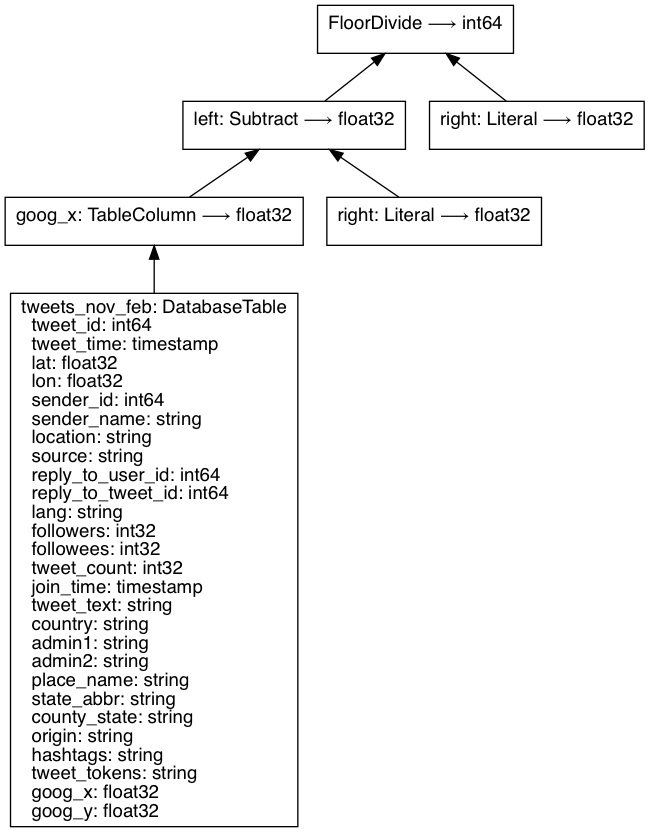

In [80]:
min_ = t.goog_x.min().execute()
max_ = t.goog_x.max().execute()
size = (min_ - max_) / n
e = ((t.goog_x - min_) // ibis.literal(size, 'float32'))
e

In [81]:
print(e.execute())

Exception: Exception: Inconsistent return type for FLOOR: SELECT floor(("goog_x" - -19793718.0) / -3971990.4) AS tmp
FROM tweets_nov_feb
LIMIT 10000

In [44]:
d = t.goog_x
tier = d.histogram(binwidth=size, base=min_).name('hist_bin')
print(tier.compile())
tier.execute()

SELECT floor(("goog_x" - -19793718.0) / 3971990.4) AS tmp
FROM tweets_nov_feb


Exception: Exception: Inconsistent return type for FLOOR: SELECT floor(("goog_x" - -19793718.0) / 3971990.4) AS tmp
FROM tweets_nov_feb
LIMIT 10000

In [12]:
c = alt.Chart(expr, width=384, height=564).mark_rect().encode(
    alt.X('goog_x:Q', bin=alt.Bin(maxbins=384)),
    alt.Y('goog_y:Q', bin=alt.Bin(maxbins=564)),
    alt.Color('count()')
).transform_filter(
    alt.FieldRangePredicate(field='goog_x', range=[-3650484.1235206556, 7413325.514451755])
).transform_filter(
    alt.FieldRangePredicate(field='goog_y', range=[-5778161.9183506705, 10471808.487466192])
)

SELECT "goog_x", "goog_y"
FROM tweets_nov_feb

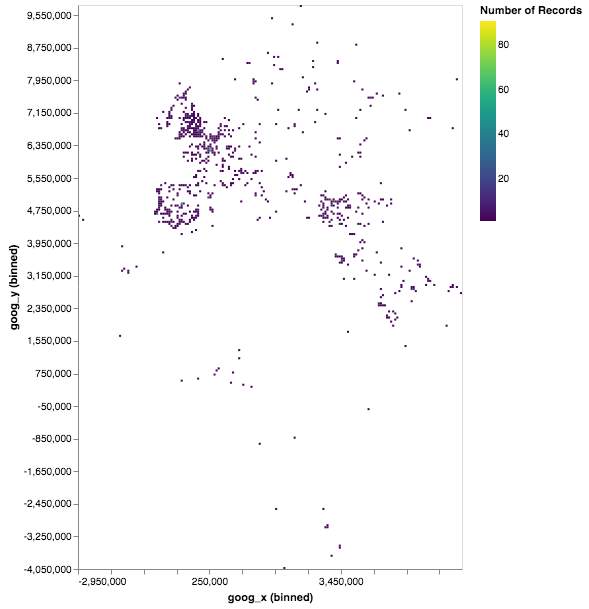

SELECT "goog_x", "goog_y"
FROM tweets_nov_feb
WHERE ("goog_x" >= -3650484.1235206556) AND
      ("goog_x" <= 7413325.514451755) AND
      ("goog_y" >= -5778161.9183506705) AND
      ("goog_y" <= 10471808.487466192)

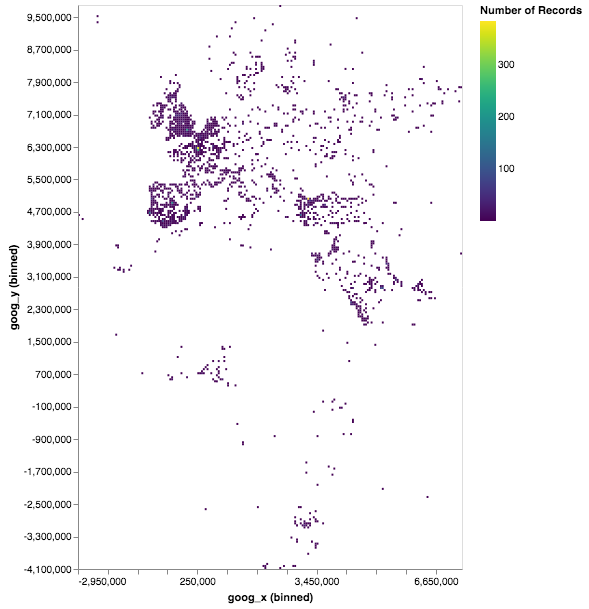

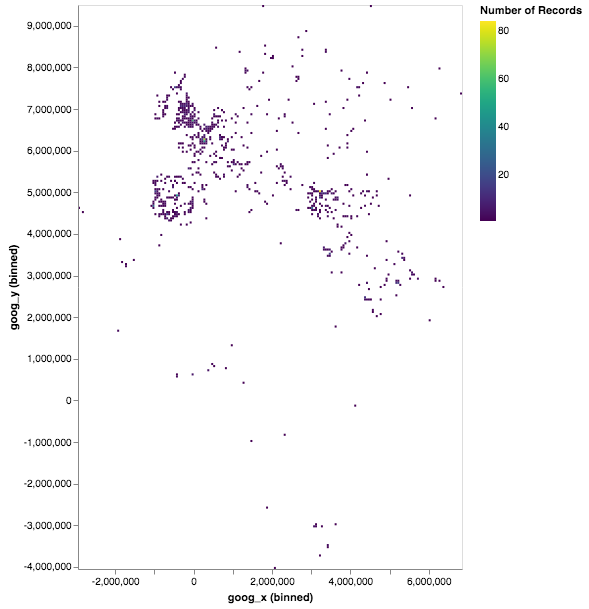

SELECT "goog_x", "goog_y"
FROM tweets_nov_feb
WHERE ("goog_x" >= -3650484.1235206556) AND
      ("goog_x" <= 7413325.514451755) AND
      ("goog_y" >= -5778161.9183506705) AND
      ("goog_y" <= 10471808.487466192)

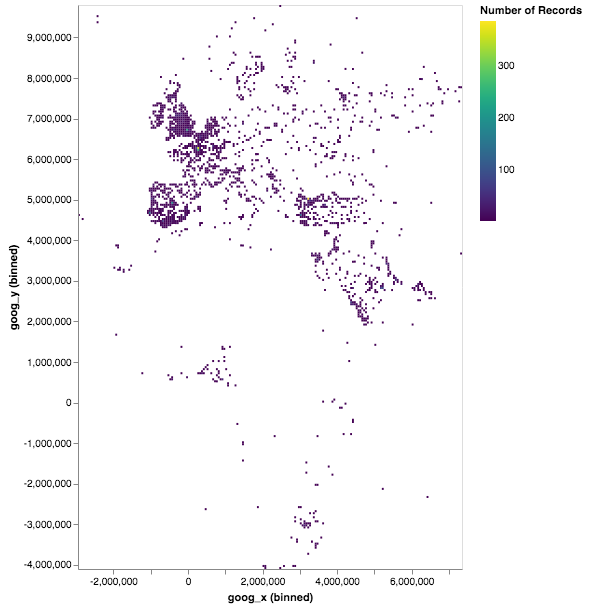

In [13]:
jupyterlab_omnisci.display_chart(c)

## "Getting More from Your Data"

/usr/local/miniconda3/envs/jupyterlab-omnisci/lib/python3.6/site-packages/altair/utils/core.py:86: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ))


SELECT "goog_x", "goog_y", "lang"
FROM tweets_nov_feb

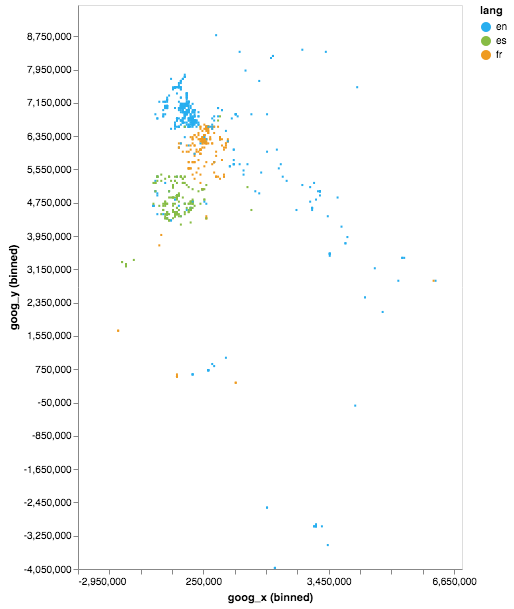

SELECT "goog_x", "goog_y", "lang"
FROM tweets_nov_feb
WHERE ("goog_x" >= -3650484.1235206556) AND
      ("goog_x" <= 7413325.514451755) AND
      ("goog_y" >= -5778161.9183506705) AND
      ("goog_y" <= 10471808.487466192)

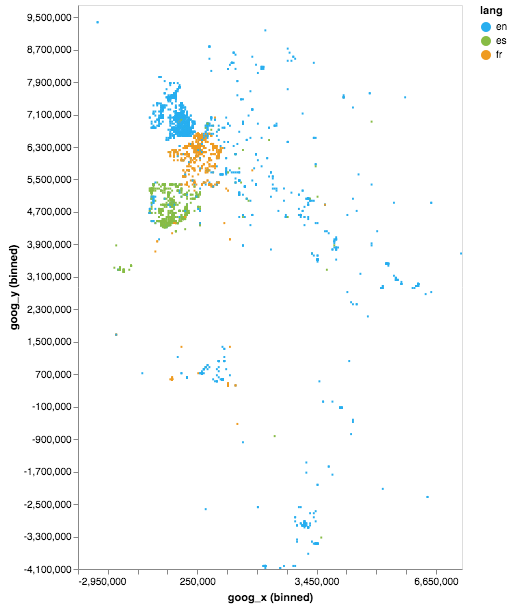

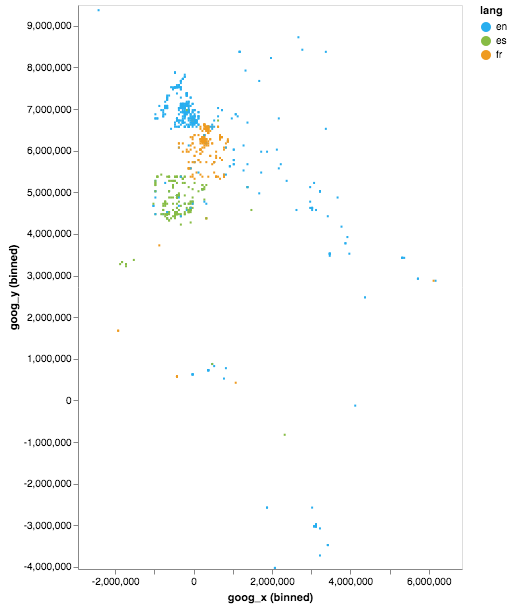

SELECT "goog_x", "goog_y", "lang"
FROM tweets_nov_feb
WHERE ("goog_x" >= -3650484.1235206556) AND
      ("goog_x" <= 7413325.514451755) AND
      ("goog_y" >= -5778161.9183506705) AND
      ("goog_y" <= 10471808.487466192)

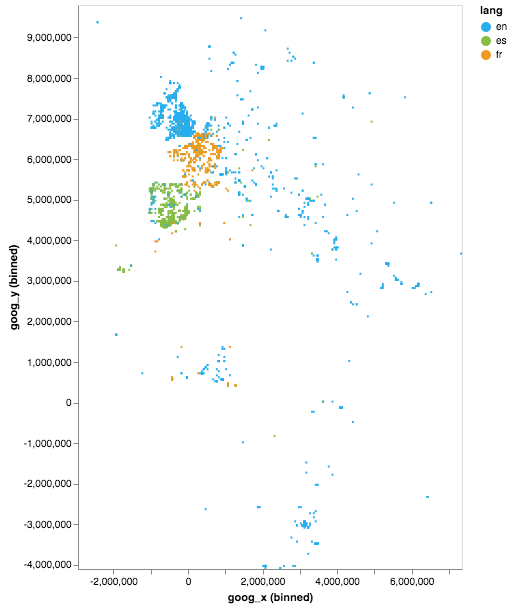

In [7]:
# can't set all to grey
# https://github.com/vega/vega-lite/issues/4255

jupyterlab_omnisci.display_chart(alt.Chart(
    t[t.goog_x, t.goog_y, t.lang],
    width=384,
    height=564
).mark_rect().encode(
    alt.X('goog_x:Q', bin=alt.Bin(maxbins=384)),
    alt.Y('goog_y:Q', bin=alt.Bin(maxbins=564)),
    color=alt.Color(
        'lang',
        scale=alt.Scale(
            domain=["en",  "es", "fr"],
            range=["#27aeef", "#87bc45", "#ef9b20"],
        ),
    )
).transform_filter(
    alt.FieldRangePredicate(field='goog_x', range=[-3650484.1235206556, 7413325.514451755])
).transform_filter(
    alt.FieldRangePredicate(field='goog_y', range=[-5778161.9183506705, 10471808.487466192])
))

### "Creating More Advanced Charts"

In [8]:
t2 = conn.table("contributions_donotmodify")

SELECT "lon", "lat", "recipient_party", "amount"
FROM contributions_donotmodify

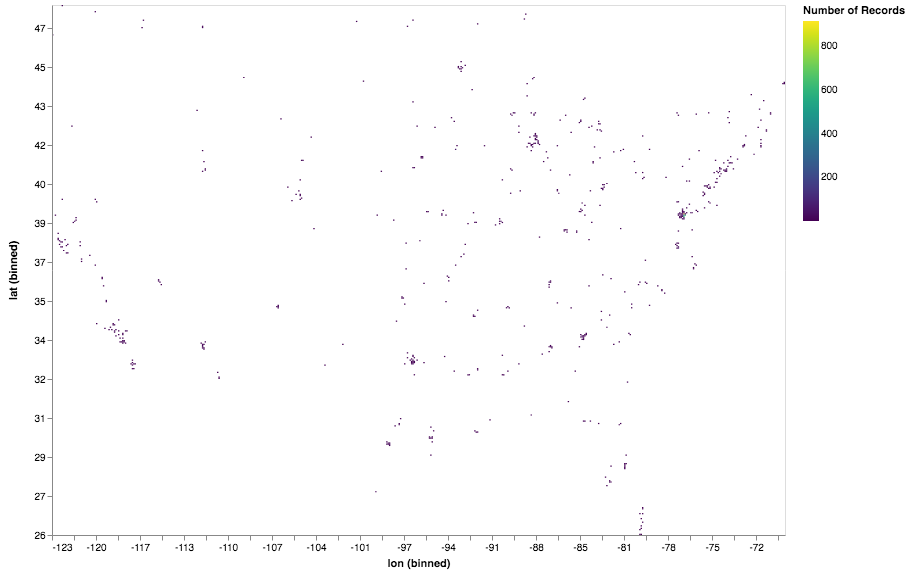

SELECT "lon", "lat", "recipient_party", "amount"
FROM contributions_donotmodify
WHERE ("lon" >= -124.39000000000038) AND
      ("lon" <= -66.93999999999943) AND
      ("lat" >= 20.61570573311549) AND
      ("lat" <= 52.93117449504004) AND
      ("recipient_party" = 'R') AND
      ("amount" > 0)

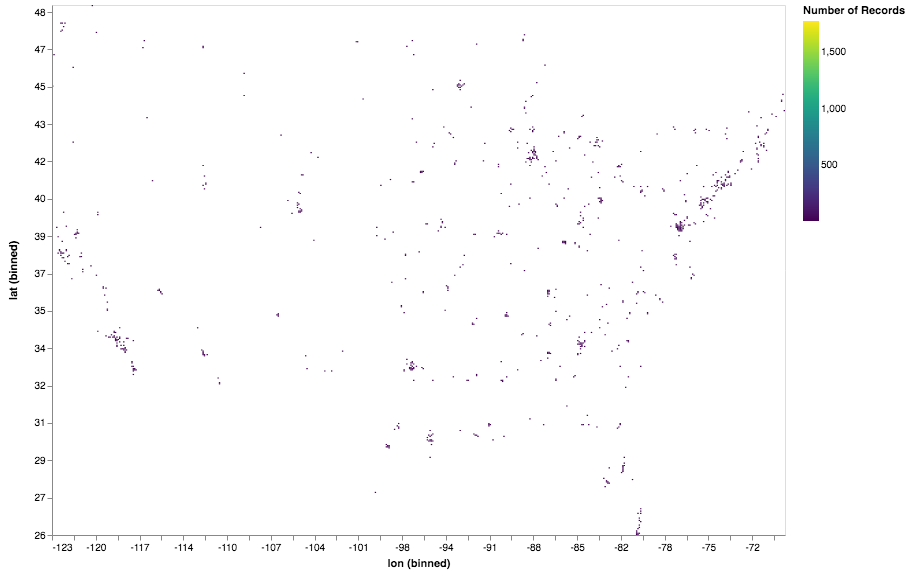

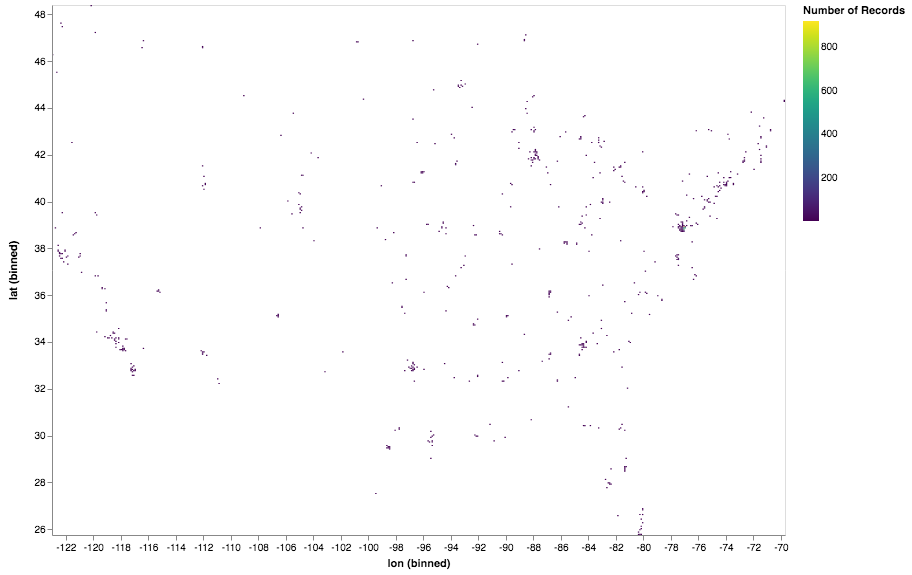

SELECT "lon", "lat", "recipient_party", "amount"
FROM contributions_donotmodify
WHERE ("lon" >= -124.39000000000038) AND
      ("lon" <= -66.93999999999943) AND
      ("lat" >= 20.61570573311549) AND
      ("lat" <= 52.93117449504004) AND
      ("recipient_party" = 'R') AND
      ("amount" > 0)

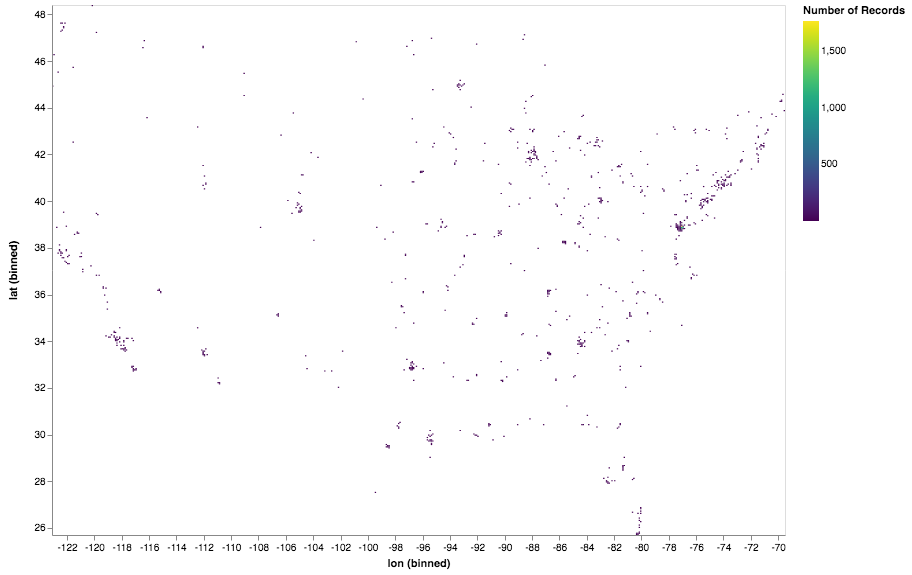

In [9]:
c = alt.Chart(
    t2[t2.lon, t2.lat, t2.recipient_party, t2.amount],
    width=733,
    height=530
).mark_rect().encode(
    alt.X('lon:Q', bin=alt.Bin(maxbins=733)),
    alt.Y('lat:Q', bin=alt.Bin(maxbins=530)),
    alt.Color('count(lon):Q')
).transform_filter(
    alt.FieldRangePredicate(field='lon', range=[-124.39000000000038, -66.93999999999943])
).transform_filter(
    alt.FieldRangePredicate(field='lat', range=[20.61570573311549, 52.93117449504004])
).transform_filter(
    alt.FieldEqualPredicate('R', 'recipient_party'),
).transform_filter(
    alt.FieldGTPredicate('amount', 0)
)
jupyterlab_omnisci.display_chart(c)

### "Working with Polys Marks Type"

TODO: Not sure how to query poly data with ibis

## Vega Accumulator
TODO: Add https://www.omnisci.com/docs/latest/6_vegaAccumulatorExample.html examples